<a href="https://colab.research.google.com/github/solomon54/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/DecisionTree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
%%html
<h1>
<marquee style='width: 100%; height:150px; color: orangered; font-size: 5rem; text-Transform: upperCase; background:#25fefe; border-radius:2rem'>
 <b>Digital-health and mental-wellness</b> Digital Lifestyle Benchmark
 </marquee></h1>
  <img  style="width:100%"
  src='https://storage.googleapis.com/kaggle-datasets-images/8659245/13624561/9979d3180154830d0ed77b8e1d49be2d/dataset-cover.png?t=2025-11-16-14-02-38'/>

#About Dataset
>This dataset examines how digital lifestyles influence mental health outcomes — including anxiety, depression, stress, happiness, focus, and productivity.

>It contains 3,500 synthetic participant records, modeled to reflect realistic behavioral and psychological patterns observed in digital wellbeing research.
With 24 research-inspired features, it offers a strong foundation for predictive modeling, correlation studies, and AI-driven wellbeing insights. 🤖



## **📌 Model Description**

This Model analyzes how digital lifestyle behaviors influence an individual's stress level. Using a dataset of 3,500 synthetic participants, we apply machine learning — specifically a Decision Tree Model — to predict stress levels based on patterns such as screen time, sleep quality, exercise habits, social media use, and digital engagement.

The goal is to:

* understand which digital habits contribute most to stress
* design an interpretable model that explains mental wellness patterns
* evaluate model performance using standard ML metrics

This Model follows a full professional ML workflow, including data preprocessing, exploratory data analysis, feature engineering, model training, evaluation, and interpretation.

---


 .

In [39]:
#STEP 2 — Import Required Libraries**

# Data manipulation & analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree # Added plot_tree here
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [57]:
url=('/content/DecisionTree/Digital-health-and-mental-wellness.csv')
df=pd.read_csv(url)

#**Data Set First Look**

In [58]:
# Show first 5 rows
df.head()



,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
0,1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,...,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,Android,70.000000,25.700000
1,2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,...,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,Laptop,64.000000,30.100000
2,3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,...,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,Android,65.299301,40.600000
3,4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,...,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,Tablet,80.000000,36.684152
4,5,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,...,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,Android,65.299301,48.400000


In [56]:


# Check shape (rows, columns)
df.shape



(3500, 24)

In [13]:

# (Check column names)
print('Check column names:\n','=='*10)
df.columns



Check column names:


Index(['id', 'age', 'gender', 'region', 'income_level', 'education_level',
       'daily_role', 'device_hours_per_day', 'phone_unlocks',
       'notifications_per_day', 'social_media_mins', 'study_mins',
       'physical_activity_days', 'sleep_hours', 'sleep_quality',
       'anxiety_score', 'depression_score', 'stress_level', 'happiness_score',
       'focus_score', 'high_risk_flag', 'device_type', 'productivity_score',
       'digital_dependence_score'],
      dtype='object')

In [14]:
# Check data types
print('Check data types:\n','=='*5)
df.info()



Check data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3500 non-null   int64  
 1   age                       3500 non-null   int64  
 2   gender                    3500 non-null   object 
 3   region                    3500 non-null   object 
 4   income_level              3500 non-null   object 
 5   education_level           3500 non-null   object 
 6   daily_role                3500 non-null   object 
 7   device_hours_per_day      3500 non-null   float64
 8   phone_unlocks             3500 non-null   int64  
 9   notifications_per_day     3500 non-null   int64  
 10  social_media_mins         3500 non-null   int64  
 11  study_mins                3500 non-null   int64  
 12  physical_activity_days    3500 non-null   float64
 13  sleep_hours               3500 non-null   flo

In [15]:
# Basic statistical summary
print('Descibe the data set:\n','=='*5)
df.describe()

Descibe the data set:


,id,age,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,study_mins,physical_activity_days,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,productivity_score,digital_dependence_score
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,28.078571,7.317677,147.107429,335.117143,159.362857,108.116571,3.350000,7.254481,2.708848,7.183858,8.830000,5.076560,6.418568,41.598600,0.201429,65.299301,36.684152
std,1010.507298,9.352385,3.239838,67.770656,239.678612,132.748048,79.796273,1.877976,1.291879,1.101105,5.043220,5.738959,3.403503,3.019828,23.764574,0.401125,9.664716,14.115504
min,1.000000,13.000000,0.280000,9.000000,22.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33.000000,5.600000
25%,875.750000,21.000000,4.867500,96.000000,170.000000,68.000000,42.000000,2.000000,6.410545,1.919438,4.000000,4.000000,1.341488,4.000000,24.750000,0.000000,59.000000,26.200000
50%,1750.500000,27.000000,6.760000,136.000000,268.000000,119.000000,102.000000,3.000000,7.291580,2.907819,6.000000,8.000000,4.809726,7.500000,44.000000,0.000000,65.299301,35.300000
75%,2625.250000,34.000000,9.152500,187.000000,434.000000,204.000000,163.000000,5.000000,8.162298,3.276968,8.845008,13.000000,8.794302,8.900000,59.000000,0.000000,71.000000,45.100000
max,3500.000000,50.000000,17.160000,374.000000,1211.000000,631.000000,418.000000,7.000000,11.004566,5.000000,27.154217,27.000000,10.000000,10.000000,100.000000,1.000000,95.000000,89.200000


# **Dat Cleaning**

In [16]:

# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("-" * 40)

# 2. Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
print("-" * 40)





Missing values per column:
id                          0
age                         0
gender                      0
region                      0
income_level                0
education_level             0
daily_role                  0
device_hours_per_day        0
phone_unlocks               0
notifications_per_day       0
social_media_mins           0
study_mins                  0
physical_activity_days      0
sleep_hours                 0
sleep_quality               0
anxiety_score               0
depression_score            0
stress_level                0
happiness_score             0
focus_score                 0
high_risk_flag              0
device_type                 0
productivity_score          0
digital_dependence_score    0
dtype: int64
----------------------------------------
Number of duplicate rows: 0
----------------------------------------


In [17]:
# Convert stress_level (continuous) → categories

def stress_category(val):
    if val <= 3:
        return "Low"
    elif val <= 7:
        return "Moderate"
    else:
        return "High"

df["stress_class"] = df["stress_level"].apply(stress_category)


/tmp/ipython-input-3763359600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stress_class', data=df, palette='Set2')


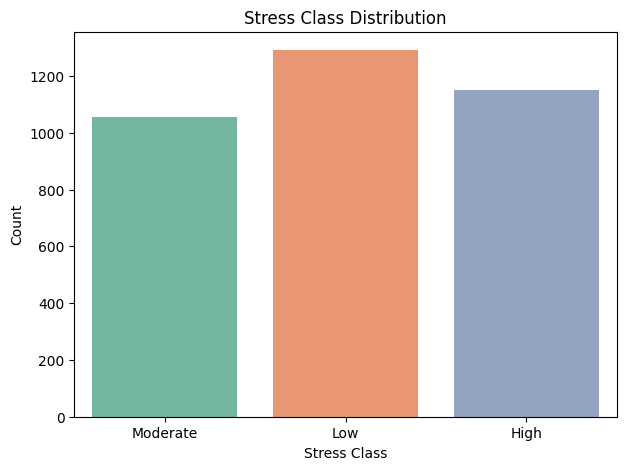

In [18]:
# Visualize distribution of the stress_class target
plt.figure(figsize=(7,5))
sns.countplot(x='stress_class', data=df, palette='Set2')
plt.title("Stress Class Distribution")
plt.xlabel("Stress Class")
plt.ylabel("Count")
plt.show()




## **Label Encoding**

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit on the entire target
y_encoded = le.fit_transform(df['stress_class'])  # Low→0, Medium→1, High→2

# Split into features and encoded target
X = df.drop(columns=['id', 'stress_class', 'stress_level'])
y = y_encoded

# Train/Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# **Train-Test Split**

In [32]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['stress_class'])  # Low->0, Moderate->1, High->2

# Features: Drop 'id', 'stress_class', 'stress_level'
X = df.drop(columns=['id', 'stress_class', 'stress_level'])

# Train/Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Confirm shapes and distribution
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution: {np.bincount(y_train)}")  # shows counts per class
print(f"y_test distribution: {np.bincount(y_test)}")

X_train shape: (2450, 22)
X_test shape: (1050, 22)
y_train distribution: [806 904 740]
y_test distribution: [346 387 317]


In [48]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['stress_class'])  # Low->0, Moderate->1, High->2

# Features: Drop 'id', 'stress_class', 'stress_level', and the problematic 'stress_category'
X = df.drop(columns=['id', 'stress_class', 'stress_level'])

# Train/Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Confirm shapes and distribution
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution: {np.bincount(y_train)}")  # shows counts per class
print(f"y_test distribution: {np.bincount(y_test)}")

X_train shape: (2450, 22)
X_test shape: (1050, 22)
y_train distribution: [806 904 740]
y_test distribution: [346 387 317]


# **Decision Tree Model Training**

In [51]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)

# Convert boolean columns in X_train and X_test to int (0 or 1)
# This handles the case where scikit-learn's check_array might have issues with bool dtypes
# when trying to coerce to float32, especially if other columns are mixed.
for col in X_train.select_dtypes(include='bool').columns:
    X_train[col] = X_train[col].astype(int)
for col in X_test.select_dtypes(include='bool').columns:
    X_test[col] = X_test[col].astype(int)

# Explicitly convert any remaining non-numeric columns in X_train and X_test to numeric,
# coercing errors to NaN and then filling them. This ensures no string columns remain.
# This step might be redundant if X is already clean, but acts as a safeguard.
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        X_train[col] = X_train[col].fillna(0) # Fill NaNs with 0, or another appropriate strategy

for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
        X_test[col] = X_test[col].fillna(0) # Fill NaNs with 0, or another appropriate strategy


# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)


# **Model Evaluation**

In [28]:
# Evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.6057142857142858

Confusion Matrix:
 [[223  31  92]
 [ 29 285  73]
 [ 51 138 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       346
           1       0.63      0.74      0.68       387
           2       0.44      0.40      0.42       317

    accuracy                           0.61      1050
   macro avg       0.60      0.59      0.59      1050
weighted avg       0.61      0.61      0.60      1050



# **Decision Tree Visualization**

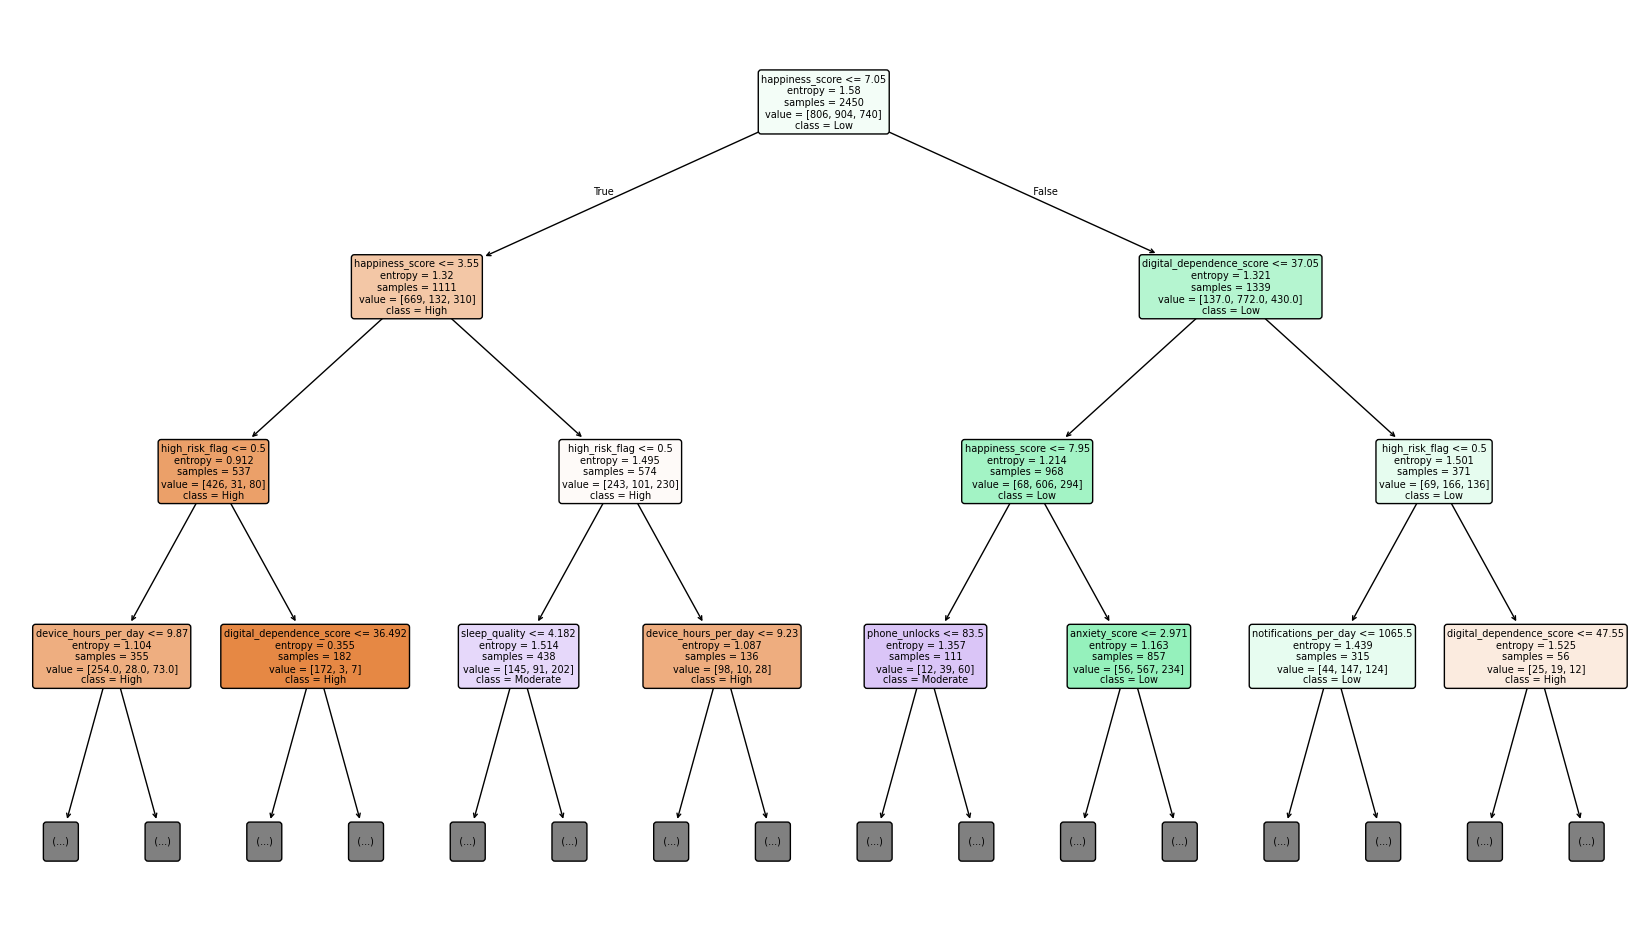

In [41]:
plt.figure(figsize=(21,12))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=7,
    max_depth=3  # only top levels for clarity
)
plt.show()

>The decision tree visualization helps us understand how the model makes predictions based on our input features. Since we set `max_depth=3`, we're seeing the top three levels of the tree.


*   **Nodes (Boxes):** Each box in the tree represents a decision node.
*   **Feature and Threshold:** Inside each node, we'll see a feature name (e.g., `device_hours_per_day`, `sleep_quality`) and a threshold value. For example, `device_hours_per_day <= 5.7` means the model splits the data based on whether a person's device usage is less than or equal to 5.7 hours.
*   **`entropy`:** This value indicates the impurity of the node. A higher entropy means a more mixed set of classes (stress levels) in that node. The goal of the decision tree is to reduce entropy as it goes down the tree.
*   **`samples`:** This shows the number of data points (participants) that fall into that specific node.
*   **`value`:** This array `[count_Low, count_Moderate, count_High]` tells us how many samples of each stress class are in that node before the split.
*   **`class`:** This indicates the predicted stress class for the majority of samples in that node. For example, if a node's `class` is 'Moderate', it means most of the samples reaching that node are classified as having moderate stress.

>By following a path from the top (root) node down to a leaf node, we can see the sequence of decisions the model takes to classify a participant's stress level based on their digital lifestyle behaviors.